In [ ]:
!pip install kaggle

Before Running the below code cell don't forget to upload your
"kaggle.json" file in the content section of the runtime.
[ The "kaggle.json" file can be downloaded from the accounts section of your kaggle profile page.]


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c cifar-10

cifar-10.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
#To extract the 7z files
!pip install py7zr

Now Extract Train Folder

In [ ]:
import py7zr
archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
filenames = os.listdir('/content/train')
print(type(filenames))
print(len(filenames)) #Prints the number of images

<class 'list'>
50000


Labels Processing

In [ ]:
labels_df = pd.read_csv('/content/trainLabels.csv')
print("**Dimensions of dataframe: **")
print(labels_df.shape)
print("**Start of dataframe: **")
print(labels_df.head())
print("**End of dataframe: **")
print(labels_df.tail())
print("**Number of images per class:**")
print(labels_df['label'].value_counts())

**Dimensions of dataframe: **
(50000, 2)
**Start of dataframe: **
   id       label
0   1        frog
1   2       truck
2   3       truck
3   4        deer
4   5  automobile
**End of dataframe: **
          id       label
49995  49996        bird
49996  49997        frog
49997  49998       truck
49998  49999  automobile
49999  50000  automobile
**Number of images per class:**
label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64


In [ ]:
#Converting the string labels to numbers:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}
labels = [labels_dictionary[i] for i in labels_df['label']]


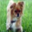

In [ ]:
#Displaying sample image
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/train/7786.png')
cv2_imshow(img)

Image Processing:

In [ ]:
id_list = list(labels_df['id'])
train_data_folder = '/content/train/'
data = []
for id in id_list:
  img_path = train_data_folder + str(id) + '.png'
  img = Image.open(img_path)
  #images are reshaped so that the images passed into the neural network are all of the same size.
  img = img.resize((32,32))
  img = np.array(img)
  data.append(img)

In [ ]:
print(type(data[0]))
print(data[0].shape)
#32 X 32 IMAGE AND 3 IS TO DEFINE THAT THE IMAGE IS COLORED
#3 32X32 matrices, 1st for red, 2nd for green and 3rd for blue

<class 'numpy.ndarray'>
(32, 32, 3)


In [ ]:
X = np.array(data)
Y = np.array(labels)
#Random state is set to some number to ensure that the data is split in the same order
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train_scaled = X_train/255
X_test_scaled = X_test/255


Epoch 1/10
1563/1563 [==============================] - 16s 7ms/step - loss: 1.5289 - accuracy: 0.4406 - val_loss: 1.2984 - val_accuracy: 0.5428
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1614 - accuracy: 0.5868 - val_loss: 1.0921 - val_accuracy: 0.6077
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0079 - accuracy: 0.6455 - val_loss: 0.9911 - val_accuracy: 0.6489
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9046 - accuracy: 0.6837 - val_loss: 0.9756 - val_accuracy: 0.6607
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8334 - accuracy: 0.7082 - val_loss: 0.9391 - val_accuracy: 0.6739
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7791 - accuracy: 0.7254 - val_loss: 0.8723 - val_accuracy: 0.6991
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7274 - accuracy: 0.7440 - val_loss: 0.9744 - val_accur

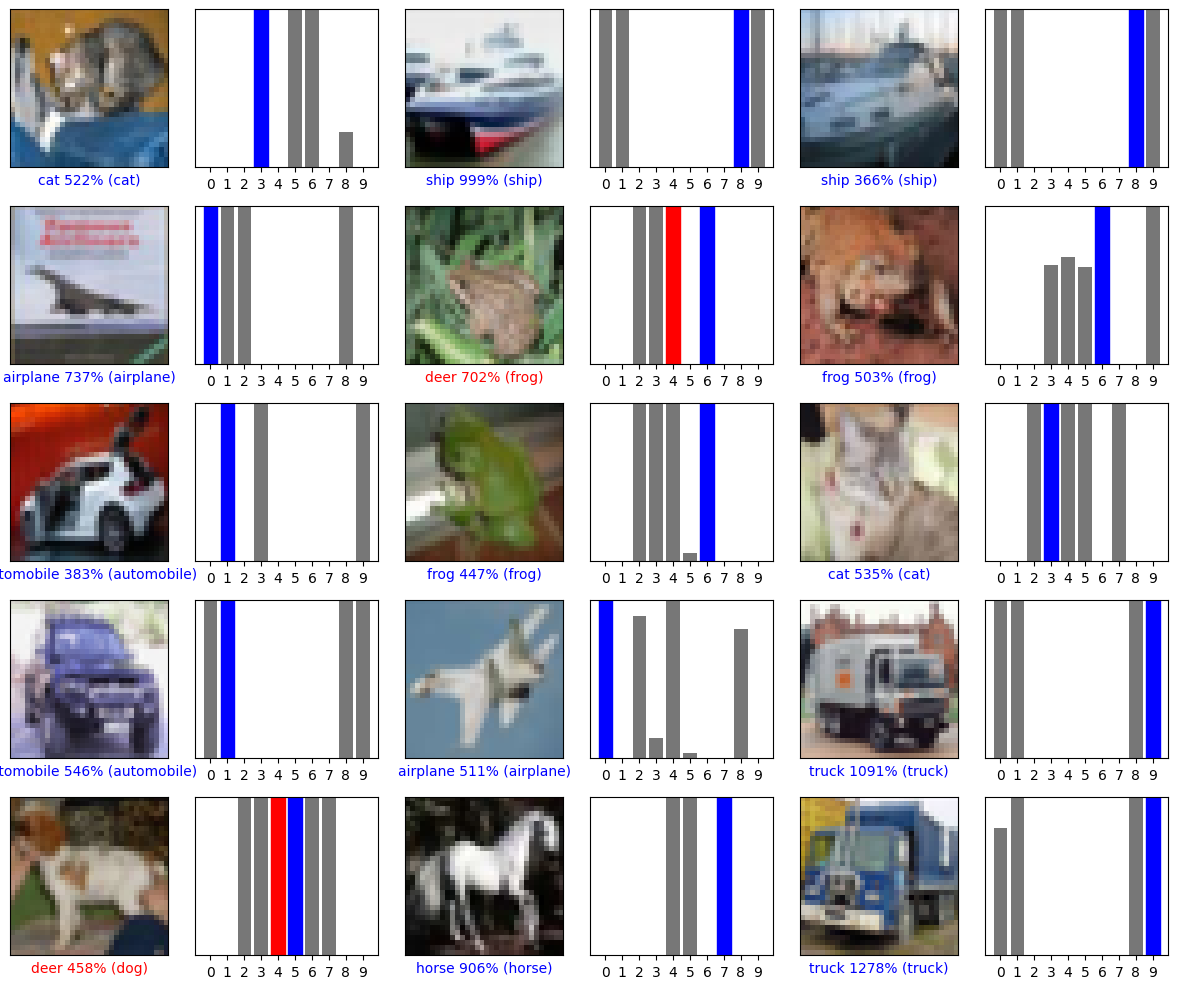

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, datasets
import numpy as np
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values such that they are between 0 and 1 (DID EARLIER TOO)
train_images, test_images = train_images / 255.0, test_images / 255.0
#Give the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
#CNN model
model = models.Sequential() #Sequential model initialization
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
#Compiling the layers created above into a single model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#Model Training
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
#Model Evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')
#Function to plot the images and the model's predictions
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array),
                                  class_names[true_label[0]]),
                                  color=color)
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')
# Predicting the labels
predictions = model.predict(test_images)
# Plot the first X test images, their predicted labels, and the true labels
# Color correct predictions in blue and incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.tight_layout()
plt.show()


In [ ]:
import gc
gc.collect()

0

HARD CODED NEURAL NETWORK WITHOUT USING ANY LIBRARIES:

In [ ]:
import numpy as np
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
#Flatten the images
train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)
#One-hot encoding
def to_one_hot(labels, num_classes=10):
    one_hot = np.zeros((labels.size, num_classes))
    one_hot[np.arange(labels.size), labels.flatten()] = 1
    return one_hot
train_labels = to_one_hot(train_labels)
test_labels = to_one_hot(test_labels)
#Initializing parameters
input_size = 32 * 32 * 3
hidden_size = 128
output_size = 10
#Weights and Biases
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))
#Activation function (ReLU)
def relu(x):
    return np.maximum(0, x)
def relu_derivative(x):
    return np.where(x > 0, 1, 0)
#Softmax function
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)
#Loss function (Cross-Entropy)
def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-9)) / m
    return loss
#Forward pass
def forward_pass(X):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2
#Backward pass (IMPORTANT)
def backward_pass(X, Y, Z1, A1, Z2, A2):
    m = X.shape[0]
    dZ2 = A2 - Y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    return dW1, db1, dW2, db2
#Optimizer (Gradient Descent with Momentum)
def update_parameters(params, grads, learning_rate, beta, v):
    for param, grad in zip(params, grads):
        v[param] = beta * v[param] + (1 - beta) * grad
        params[param] -= learning_rate * v[param]
    return params, v
#Training the neural network
def train(X_train, Y_train, epochs=100, learning_rate=0.01, beta=0.9):
    global W1, b1, W2, b2
    v = [np.zeros_like(W1), np.zeros_like(b1), np.zeros_like(W2), np.zeros_like(b2)]
    params = [W1, b1, W2, b2]
    for epoch in range(epochs):
        Z1, A1, Z2, A2 = forward_pass(X_train)
        loss = cross_entropy_loss(Y_train, A2)
        dW1, db1, dW2, db2 = backward_pass(X_train, Y_train, Z1, A1, Z2, A2)
        grads = [dW1, db1, dW2, db2]
        # Update parameters using the list
        for i in range(len(params)):
            v[i] = beta * v[i] + (1 - beta) * grads[i]
            params[i] -= learning_rate * v[i]
        W1, b1, W2, b2 = params # Update global variables
        if epoch % 1 == 0:
            print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}')
# Evaluation of model
def predict(X):
    _, _, _, A2 = forward_pass(X)
    return np.argmax(A2, axis=1)
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)
#Training the model
train(train_images, train_labels, epochs=100, learning_rate=0.01)
#Evaluating the dataset on testing data
test_predictions = predict(test_images)
test_accuracy = accuracy(np.argmax(test_labels, axis=1), test_predictions)
print(f'Test Accuracy: {test_accuracy:.4f}')


Epoch 1/100, Loss: 2.3022
Epoch 2/100, Loss: 2.3022
Epoch 3/100, Loss: 2.3022
Epoch 4/100, Loss: 2.3021
Epoch 5/100, Loss: 2.3021
Epoch 6/100, Loss: 2.3020
Epoch 7/100, Loss: 2.3019
Epoch 8/100, Loss: 2.3018
Epoch 9/100, Loss: 2.3017
Epoch 10/100, Loss: 2.3015
Epoch 11/100, Loss: 2.3014
Epoch 12/100, Loss: 2.3013
Epoch 13/100, Loss: 2.3011
Epoch 14/100, Loss: 2.3010
Epoch 15/100, Loss: 2.3008
Epoch 16/100, Loss: 2.3007
Epoch 17/100, Loss: 2.3005
Epoch 18/100, Loss: 2.3004
Epoch 19/100, Loss: 2.3002
Epoch 20/100, Loss: 2.3000
Epoch 21/100, Loss: 2.2999
Epoch 22/100, Loss: 2.2997
Epoch 23/100, Loss: 2.2995
Epoch 24/100, Loss: 2.2994
Epoch 25/100, Loss: 2.2992
Epoch 26/100, Loss: 2.2991
Epoch 27/100, Loss: 2.2989
Epoch 28/100, Loss: 2.2987
Epoch 29/100, Loss: 2.2986
Epoch 30/100, Loss: 2.2984
Epoch 31/100, Loss: 2.2982
Epoch 32/100, Loss: 2.2981
Epoch 33/100, Loss: 2.2979
Epoch 34/100, Loss: 2.2977
Epoch 35/100, Loss: 2.2976
Epoch 36/100, Loss: 2.2974
Epoch 37/100, Loss: 2.2972
Epoch 38/1

The above neural network gives very low accuracy due to less number of layers and epochs (Also to mention that it's not a CNN and just a basic deep learning model)

Garbage Collector to Clear System Ram

In [ ]:
import gc
gc.collect()

26